In [2]:
#Import the libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
#Import the data set
Datadf = pd.read_csv("C:/heart.csv")

In [4]:
#Preprocess the data 
Datadf.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#investigate the target variable 
Datadf.target.value_counts()

1    165
0    138
Name: target, dtype: int64

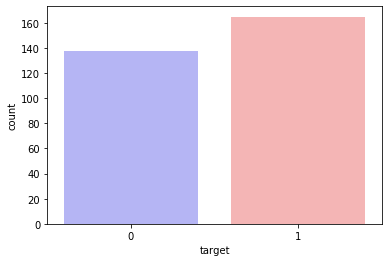

In [6]:
#Visualize the target variable
sns.countplot(x="target", data=Datadf, palette="bwr")
plt.show()

In [7]:
#Checking missign values 
Datadf.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
Datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
#creat the dummay variables for the categorical variables 
dummycp = pd.get_dummies(Datadf['cp'], prefix = "cp")
dummythal = pd.get_dummies(Datadf['thal'], prefix = "thal")
dummyslope= pd.get_dummies(Datadf['slope'], prefix = "slope")
dummyslope= pd.get_dummies(Datadf['restecg'], prefix = "restecg")

In [10]:
# Add created dummay variables to the main data frame 
frames = [Datadf, dummycp, dummythal, dummyslope]
Datadf = pd.concat(frames, axis = 1)
Datadf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,1,0


In [11]:
# drop the initial variable which have been used to create the dummay variables 
Datadf = Datadf.drop(columns = ['cp', 'thal', 'slope','restecg'])
Datadf.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,1,0,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,0,0,0,1,0,0,1,0


In [12]:
#Create the X and Y variables 
y = Datadf.target.values
x_data = Datadf.drop(['target'], axis = 1)

In [13]:
# Normalize the explanatory variables 
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [14]:
x.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.816794,0.0,0.129032,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.702290,1.0,0.096774,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [15]:
#Split the variables in to tran and test sets for both explanatory and dependent set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [16]:
#Investigate the train data set for X 
x_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
74,0.291667,0.0,0.264151,0.198630,0.0,0.717557,0.0,0.032258,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
153,0.770833,0.0,0.490566,0.347032,0.0,0.618321,0.0,0.000000,0.25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
64,0.604167,1.0,0.433962,0.194064,1.0,0.717557,0.0,0.000000,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
296,0.708333,0.0,0.283019,0.162100,0.0,0.496183,1.0,0.000000,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
287,0.583333,1.0,0.566038,0.242009,0.0,0.709924,0.0,0.000000,0.25,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [48]:
# For the logistic regression model 
accuracies = {}
lor = LogisticRegression()
lor.fit(x_train,y_train)
accuracy = lor.score(x_test,y_test)*100

accuracies['Logistic Regression'] = accuracy
print("Test Accuracy {:.2f}%".format(accuracy))

Test Accuracy 85.25%


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
#Predict the values based on the x test 
predict1=lor.predict(x_test)
predict1

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [50]:
# print the classifies report : Predict1 
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

   micro avg       0.85      0.85      0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [51]:
# print the confusion matrix : For predict 1 
print(confusion_matrix(y_test,predict1))

[[21  6]
 [ 3 31]]


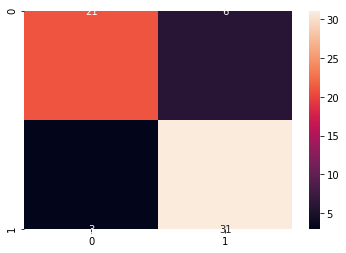

In [24]:
#Visualize the confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predict1), annot=True)

In [35]:
# Accuracy, recall and precision 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predict1))
# Recall
from sklearn.metrics import recall_score
print(recall_score(y_test, predict1))
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_test, predict1))

0.8524590163934426
0.9117647058823529
0.8378378378378378


In [28]:
#develop a confusion matrix
cm = confusion_matrix(y_test,predict1)

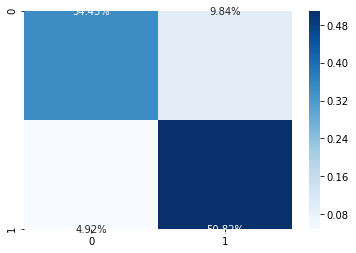

In [31]:
#visualize the confusion matrix 
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

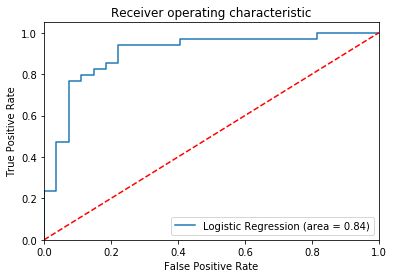

In [36]:
# Build ROC AUC 
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lor.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lor.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [41]:
#Build the gradient boosting method 
from sklearn.ensemble import GradientBoostingClassifier
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(x_train, y_train)
predictions = gb_clf2.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[23  4]
 [ 8 26]]
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.87      0.76      0.81        34

   micro avg       0.80      0.80      0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



In [42]:
accuracygb = gb_clf2.score(x_test,y_test)*100

accuracies['Gradient Boosting'] = accuracygb
print("Test Accuracy {:.2f}%".format(accuracygb))

Test Accuracy 80.33%


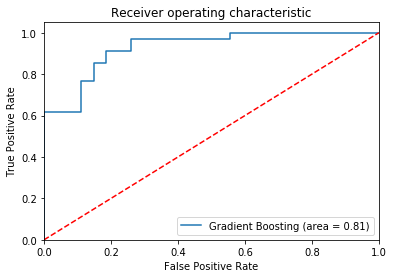

In [40]:
# Build ROC AUC 
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
GB_roc_auc = roc_auc_score(y_test, gb_clf2.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, gb_clf2.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % GB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

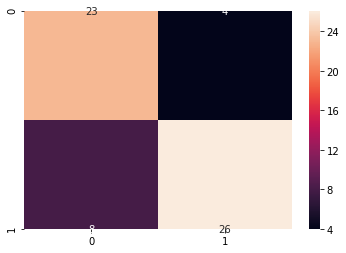

In [47]:
#Visualize the confusion matrix 
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)

In [ ]:
#Hyperparamter Optimizations 

In [66]:
from sklearn.model_selection import RepeatedStratifiedKFold

#Define the model
model = LogisticRegression()
#define the hyperparameter set
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','8']
c_values = [100, 10, 1.0, 0.5, 0.01]

# Grid search 
grid = dict(solver=solvers,penalty=penalty,C=c_values)
#define the cross validation 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#Call grid search
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
#Train the model
grid_result = grid_search.fit(x_train, y_train)

#Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



Best: 0.825069 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.808540 (0.085601) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.807163 (0.084173) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.808540 (0.084928) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': '8', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': '8', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': '8', 'solver': 'liblinear'}
0.818182 (0.074996) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.818182 (0.074996) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.818182 (0.075758) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': '8', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': '8', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 10, 'penalty': '8', 'solver': 'liblinear'}
0.825069 (0.078660) with: {'C': 

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [68]:
#Applied the test data to the optimized mode using hyper paramter 
#Predict test data set.uing optimized model logistic regression 
y_pred = grid_result.predict(x_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

   micro avg       0.85      0.85      0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



0.8447712418300652

In [ ]:
#Hyper paramter tuning for the gradient boosting

In [73]:
#define the hyperparamter set
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
max_depths = np.linspace(1, 32, 32, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

#dictionary
hyperparameters = dict(learning_rate=learning_rates,n_estimators=n_estimators,max_depth=max_depths,min_samples_split=min_samples_splits)
#Create new gradient boosting classifier 
gb_clf4 = GradientBoostingClassifier()
#GridSearch
clf2= GridSearchCV(gb_clf4, hyperparameters, cv=10)
#Fit the model
best_model = clf2.fit(x_train,y_train)


Best leaf_size: 0.5
Best p: 8


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


KeyError: 'max_depths'

In [74]:
#best Hyperparameters
print('learning_rate', best_model.best_estimator_.get_params()['learning_rate'])
print('n_estimators', best_model.best_estimator_.get_params()['n_estimators'])
print('max_depth', best_model.best_estimator_.get_params()['max_depth'])
print('min_samples_split', best_model.best_estimator_.get_params()['min_samples_split'])

learning_rate 0.5
n_estimators 8
max_depth 1.0
min_samples_split 0.1


In [75]:
#apply the best model hyperparamters to the test data
#Predict test data set.
y_pred8 = best_model.predict(x_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred8))

#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred8)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

   micro avg       0.85      0.85      0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



0.8485838779956427